<a href="https://colab.research.google.com/github/sufpro/colabnotebooks/blob/advanced-nlp-with-python-for-machine-learning-Gwendolyn-Stripling/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Libraries and Modules
import spacy
from textblob import TextBlob
import pandas as pd
import csv

import seaborn as sns
import matplotlib.pyplot as plt

**File Handling, Sentiment Analysis and NLP**

In [59]:
#Define the path to the file containing feedback
file_path = './content/feedback_data.csv'

# Read the file using open() with the specified parameters
with open(file_path, "r", encoding="utf-8") as file:
    # Step 2: Read the lines of the file
    feedback_data = file.readlines()

# Add code to output feedback results to a file.
output_csv_path = "./content/feedback_analysis_results.csv"

# Prepare CSV header
csv_header = ["Feedback Index", "Feedback", "Sentiment Polarity", "Sentiment Subjectivity", "Named Entities", "Preferred Contact Method"]

# Open CSV file for writing
with open(output_csv_path, "w", newline="", encoding="utf-8") as csv_file:
    # Create CSV writer
    csv_writer = csv.writer(csv_file)

    # Write the header
    csv_writer.writerow(csv_header)

    # Process and analyze each feedback
    for idx, narrative in enumerate(feedback_data, start=1):
        print(f"\nProcessing Feedback {idx}:")
        print("------------------------------")
        print(narrative.strip())

# Perform sentiment analysis on looped text using TextBlob
        blob = TextBlob(narrative)
        sentiment_polarity = blob.sentiment.polarity
        sentiment_subjectivity = blob.sentiment.subjectivity
        print(f"Sentiment: {sentiment_polarity} (Polarity), {sentiment_subjectivity} (Subjectivity)")

# Load the English NLP model
        nlp = spacy.load("en_core_web_sm")

        # Process the narrative using spaCy
        doc = nlp(narrative)

        # Extract named entities
        entities = [(ent.text, ent.label_) for ent in doc.ents]
        print("Named Entities:", entities)

        # Determine the preferred contact method
        preferred_contact_method = "chat" if "email" not in narrative.lower() else "email"
        print(f"Preferred Contact Method: {preferred_contact_method}")

# Write the results to the CSV file
        csv_writer.writerow([idx, narrative.strip(), sentiment_polarity, sentiment_subjectivity, entities, preferred_contact_method])


Processing Feedback 1:
------------------------------
Your products are excellent. I really love the quality! However, delivery to my location in Los Angeles was a bit slow. abbey@email.com
Sentiment: 0.44166666666666665 (Polarity), 0.6666666666666666 (Subjectivity)
Named Entities: [('Los Angeles', 'GPE')]
Preferred Contact Method: email

Processing Feedback 2:
------------------------------
The customer service team in New York was helpful in resolving my issue. I appreciate the assistance. brian@email.com
Sentiment: 0.13636363636363635 (Polarity), 0.45454545454545453 (Subjectivity)
Named Entities: [('New York', 'GPE')]
Preferred Contact Method: email

Processing Feedback 3:
------------------------------
The new features in the latest release are fantastic! They have greatly improved the user experience in San Francisco.
Sentiment: 0.48409090909090907 (Polarity), 0.7511363636363636 (Subjectivity)
Named Entities: [('San Francisco', 'GPE')]
Preferred Contact Method: chat

Processing F

In [66]:
##Load results file into a Pandas Dataframe

# Load data into a Pandas DataFrame
df = pd.read_csv('./content/feedback_analysis_results.csv')

# Display the DataFrame
df.head()

,Feedback Index,Feedback,Sentiment Polarity,Sentiment Subjectivity,Named Entities,Preferred Contact Method
0,1,Your products are excellent. I really love the...,0.441667,0.666667,"[('Los Angeles', 'GPE')]",email
1,2,The customer service team in New York was help...,0.136364,0.454545,"[('New York', 'GPE')]",email
2,3,The new features in the latest release are fan...,0.484091,0.751136,"[('San Francisco', 'GPE')]",chat
3,4,"The product didn't meet my expectations, and I...",-0.750000,0.750000,"[('Chicago', 'GPE')]",email


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Feedback Index            4 non-null      int64  
 1   Feedback                  4 non-null      object 
 2   Sentiment Polarity        4 non-null      float64
 3   Sentiment Subjectivity    4 non-null      float64
 4   Named Entities            4 non-null      object 
 5   Preferred Contact Method  4 non-null      object 
dtypes: float64(2), int64(1), object(3)
memory usage: 324.0+ bytes


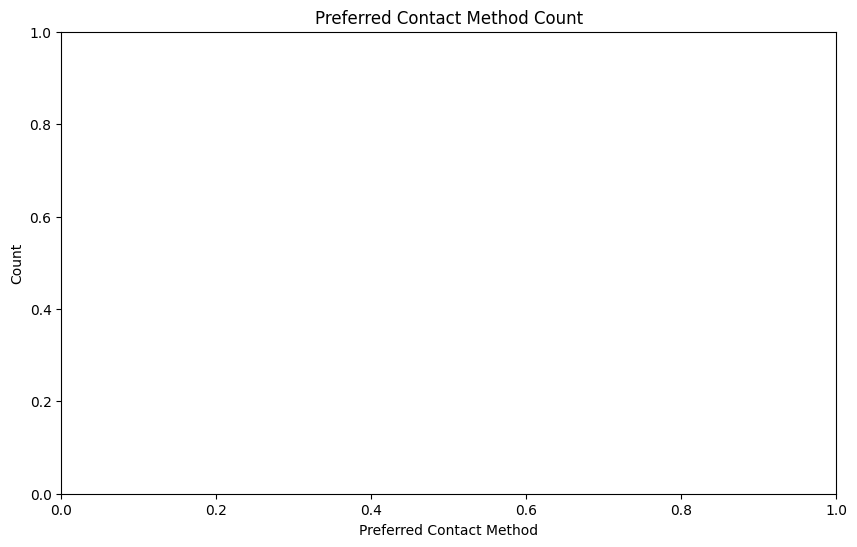

In [69]:
# Example plot: Preferred Contact Method Count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Preferred Contact Method', palette='muted')
plt.title('Preferred Contact Method Count')
plt.xlabel('Preferred Contact Method')
plt.ylabel('Count')
plt.show()